In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [7]:
data = pd.read_csv('project1.csv')
data

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
381,no-recurrence-events,40-49,premeno,30-34,3-5,no,3,right,left_low,no
382,no-recurrence-events,60-69,ge40,30-34,3-5,yes,2,right,left_up,yes
383,no-recurrence-events,70-79,premeno,20-24,0-2,no,3,right,right_up,no
384,no-recurrence-events,70-79,premeno,30-34,9-11,no,1,right,left_low,yes


In [8]:
data.shape

(386, 10)

In [9]:
data.size

3860

In [10]:
data.dtypes

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [14]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
381    False
382    False
383    False
384    False
385    False
Length: 386, dtype: bool

In [17]:
data.duplicated().sum()

11

In [18]:
data.drop_duplicates(inplace=True, ignore_index=True)

In [19]:
data.duplicated().sum()

0

In [20]:
data.describe()

,deg-malig
count,375.000000
mean,2.074667
std,0.752730
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [21]:
data['class'] = data['class'].map({'recurrence-events': 1, 'no-recurrence-events': 0})

In [24]:
data.dtypes

class           int64
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [25]:
data['irradiat'] = data['irradiat'].map({'yes': 1, 'no': 0})

In [26]:
data.dtypes

class           int64
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat        int64
dtype: object

In [27]:
data

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,30-39,premeno,30-34,0-2,no,3,left,left_low,0
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,0
2,1,40-49,premeno,20-24,0-2,no,2,left,left_low,0
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,0
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,0
...,...,...,...,...,...,...,...,...,...,...
370,0,40-49,premeno,30-34,3-5,no,3,right,left_low,0
371,0,60-69,ge40,30-34,3-5,yes,2,right,left_up,1
372,0,70-79,premeno,20-24,0-2,no,3,right,right_up,0
373,0,70-79,premeno,30-34,9-11,no,1,right,left_low,1


In [28]:
def calculate_midpoint(range_str):
    if isinstance(range_str, str) and '-' in range_str:
        lower, upper = map(int, range_str.split('-'))
        return (lower + upper) / 2
    return range_str

#Used DeepSeek R1 model to produce this function

In [29]:
data['age'] = data['age'].apply(calculate_midpoint).astype(float)

In [30]:
data

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,34.5,premeno,30-34,0-2,no,3,left,left_low,0
1,0,44.5,premeno,20-24,0-2,no,2,right,right_up,0
2,1,44.5,premeno,20-24,0-2,no,2,left,left_low,0
3,0,64.5,ge40,15-19,0-2,no,2,right,left_up,0
4,0,44.5,premeno,0-4,0-2,no,2,right,right_low,0
...,...,...,...,...,...,...,...,...,...,...
370,0,44.5,premeno,30-34,3-5,no,3,right,left_low,0
371,0,64.5,ge40,30-34,3-5,yes,2,right,left_up,1
372,0,74.5,premeno,20-24,0-2,no,3,right,right_up,0
373,0,74.5,premeno,30-34,9-11,no,1,right,left_low,1


In [32]:
data['tumor-size'] = data['tumor-size'].apply(calculate_midpoint).astype(float)
data['inv-nodes'] = data['inv-nodes'].apply(calculate_midpoint).astype(float)
data

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,34.5,premeno,32.0,1.0,no,3,left,left_low,0
1,0,44.5,premeno,22.0,1.0,no,2,right,right_up,0
2,1,44.5,premeno,22.0,1.0,no,2,left,left_low,0
3,0,64.5,ge40,17.0,1.0,no,2,right,left_up,0
4,0,44.5,premeno,2.0,1.0,no,2,right,right_low,0
...,...,...,...,...,...,...,...,...,...,...
370,0,44.5,premeno,32.0,4.0,no,3,right,left_low,0
371,0,64.5,ge40,32.0,4.0,yes,2,right,left_up,1
372,0,74.5,premeno,22.0,1.0,no,3,right,right_up,0
373,0,74.5,premeno,32.0,10.0,no,1,right,left_low,1


In [33]:
data['node-caps'] = data['node-caps'].map({'yes': 1, 'no': 0})
data

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,34.5,premeno,32.0,1.0,0.0,3,left,left_low,0
1,0,44.5,premeno,22.0,1.0,0.0,2,right,right_up,0
2,1,44.5,premeno,22.0,1.0,0.0,2,left,left_low,0
3,0,64.5,ge40,17.0,1.0,0.0,2,right,left_up,0
4,0,44.5,premeno,2.0,1.0,0.0,2,right,right_low,0
...,...,...,...,...,...,...,...,...,...,...
370,0,44.5,premeno,32.0,4.0,0.0,3,right,left_low,0
371,0,64.5,ge40,32.0,4.0,1.0,2,right,left_up,1
372,0,74.5,premeno,22.0,1.0,0.0,3,right,right_up,0
373,0,74.5,premeno,32.0,10.0,0.0,1,right,left_low,1


In [34]:
data['menopause'] = data['menopause'].astype('category')
data['breast'] = data['breast'].astype('category')
data['breast-quad'] = data['breast-quad'].astype('category')

In [36]:
data.dtypes

class             int64
age             float64
menopause      category
tumor-size      float64
inv-nodes       float64
node-caps       float64
deg-malig         int64
breast         category
breast-quad    category
irradiat          int64
dtype: object

In [43]:
node_caps_median= data['node-caps'].median()
data['node-caps'] = data['node-caps'].fillna(node_caps_median)
data['node-caps'] = data['node-caps'].astype(int)
data

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,34.5,premeno,32.0,1.0,0,3,left,left_low,0
1,0,44.5,premeno,22.0,1.0,0,2,right,right_up,0
2,1,44.5,premeno,22.0,1.0,0,2,left,left_low,0
3,0,64.5,ge40,17.0,1.0,0,2,right,left_up,0
4,0,44.5,premeno,2.0,1.0,0,2,right,right_low,0
...,...,...,...,...,...,...,...,...,...,...
370,0,44.5,premeno,32.0,4.0,0,3,right,left_low,0
371,0,64.5,ge40,32.0,4.0,1,2,right,left_up,1
372,0,74.5,premeno,22.0,1.0,0,3,right,right_up,0
373,0,74.5,premeno,32.0,10.0,0,1,right,left_low,1


In [44]:
data.dtypes

class             int64
age             float64
menopause      category
tumor-size      float64
inv-nodes       float64
node-caps         int64
deg-malig         int64
breast         category
breast-quad    category
irradiat          int64
dtype: object

In [45]:
data.isnull().sum()

class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [46]:
tumor_size_median = data['tumor-size'].median()
inv_nodes_median = data['inv-nodes'].median()
data['tumor-size'] = data['tumor-size'].fillna(tumor_size_median)
data['inv-nodes'] = data['tumor-size'].fillna(inv_nodes_median)
data.isnull().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [47]:
data.describe()

,class,age,tumor-size,inv-nodes,node-caps,deg-malig,irradiat
count,375.000000,375.000000,375.00000,375.00000,375.000000,375.000000,375.000000
mean,0.322667,51.833333,24.80000,24.80000,0.258667,2.074667,0.218667
std,0.468121,11.249876,10.95201,10.95201,0.438487,0.752730,0.413894
min,0.000000,24.500000,2.00000,2.00000,0.000000,1.000000,0.000000
25%,0.000000,44.500000,17.00000,17.00000,0.000000,2.000000,0.000000
50%,0.000000,54.500000,27.00000,27.00000,0.000000,2.000000,0.000000
75%,1.000000,64.500000,32.00000,32.00000,1.000000,3.000000,0.000000
max,1.000000,74.500000,52.00000,52.00000,1.000000,3.000000,1.000000


<Axes: xlabel='age', ylabel='Count'>

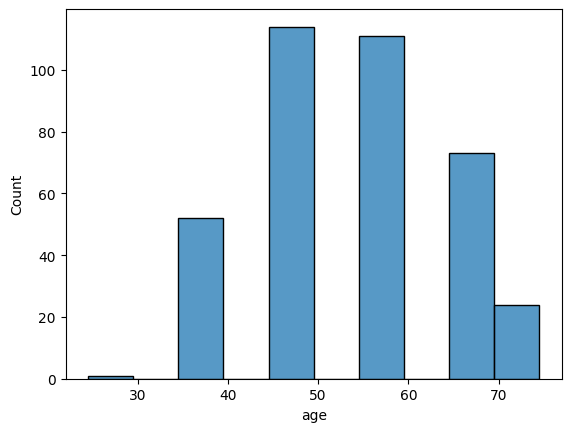

In [50]:
sns.histplot(data=data['age'] )

In [51]:
# Dataset focuses on women mainly in their 50s and 60

<Axes: xlabel='menopause', ylabel='Count'>

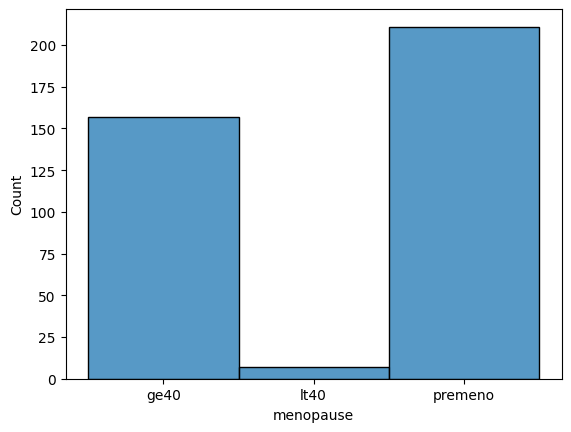

In [52]:
sns.histplot(data=data['menopause'] )

<Axes: xlabel='tumor-size', ylabel='Count'>

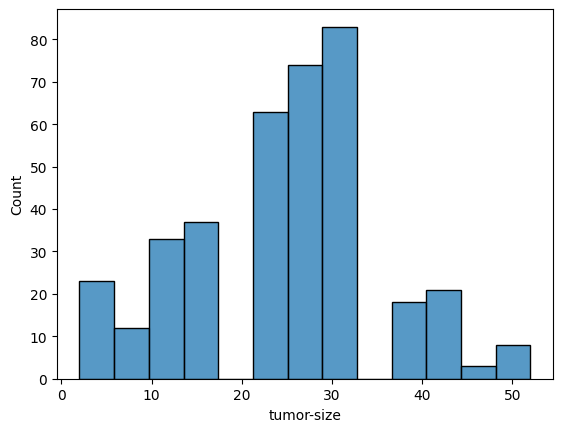

In [53]:
sns.histplot(data=data['tumor-size'] )

In [54]:
#Most tumors seem to fall in the 20s - 30s size

<function matplotlib.pyplot.show(close=None, block=None)>

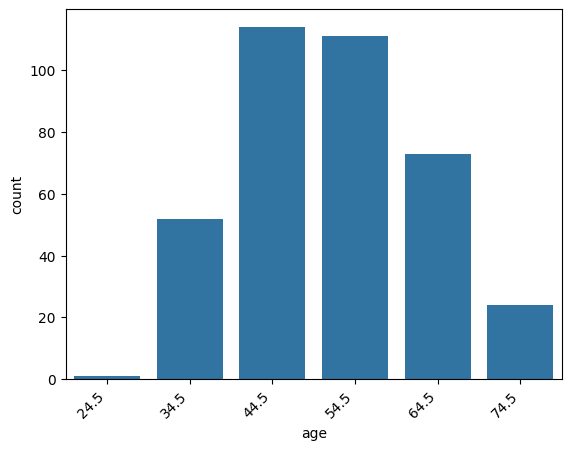

In [55]:
sns.countplot(x=data['age'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

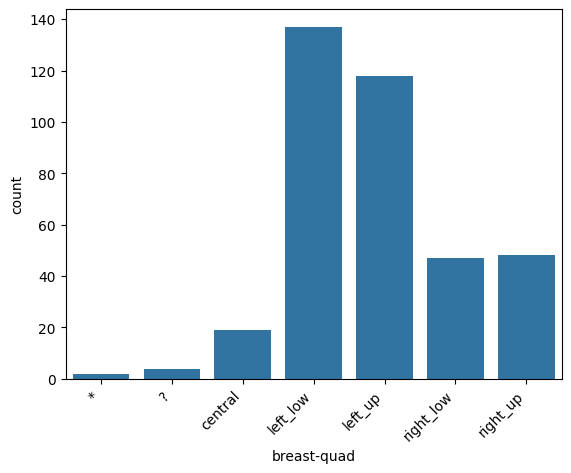

In [56]:
sns.countplot(x=data['breast-quad'])
plt.xticks(rotation=45, ha='right')
plt.show

In [57]:
# This shows that most of the tumors seem to be presenting on the left breast

<Axes: xlabel='deg-malig', ylabel='Count'>

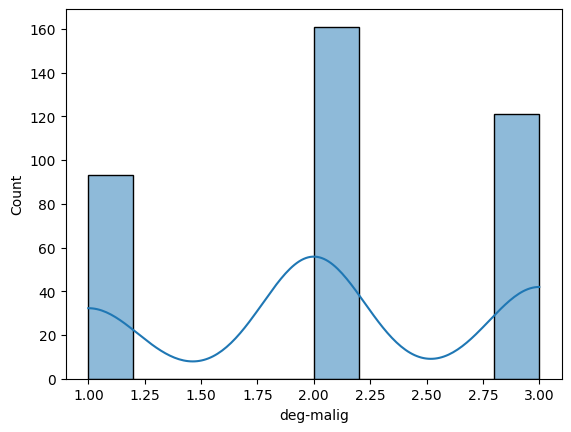

In [59]:
sns.histplot(data=data['deg-malig'], kde=True)


<Axes: xlabel='age'>

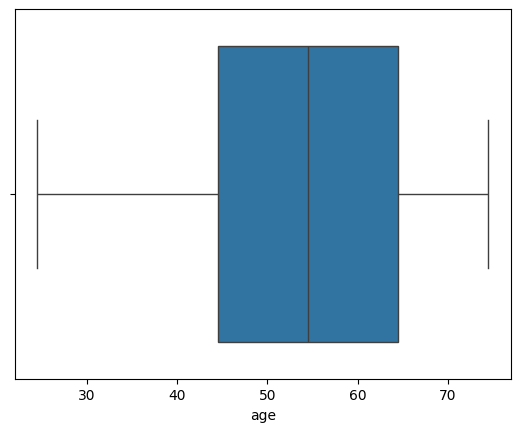

In [60]:
sns.boxplot(data=data, x='age')


In [61]:
# This shows a box plot of age showing that most of the women were between their mid 40's to 60's

In [62]:
data.dtypes

class             int64
age             float64
menopause      category
tumor-size      float64
inv-nodes       float64
node-caps         int64
deg-malig         int64
breast         category
breast-quad    category
irradiat          int64
dtype: object

In [63]:
data = pd.get_dummies(data, columns=["menopause"], drop_first=True)
data

,class,age,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,menopause_lt40,menopause_premeno
0,1,34.5,32.0,32.0,0,3,left,left_low,0,False,True
1,0,44.5,22.0,22.0,0,2,right,right_up,0,False,True
2,1,44.5,22.0,22.0,0,2,left,left_low,0,False,True
3,0,64.5,17.0,17.0,0,2,right,left_up,0,False,False
4,0,44.5,2.0,2.0,0,2,right,right_low,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
370,0,44.5,32.0,32.0,0,3,right,left_low,0,False,True
371,0,64.5,32.0,32.0,1,2,right,left_up,1,False,False
372,0,74.5,22.0,22.0,0,3,right,right_up,0,False,True
373,0,74.5,32.0,32.0,0,1,right,left_low,1,False,True


In [64]:
data = pd.get_dummies(data, columns=["breast"], drop_first=True)
data

,class,age,tumor-size,inv-nodes,node-caps,deg-malig,breast-quad,irradiat,menopause_lt40,menopause_premeno,breast_right
0,1,34.5,32.0,32.0,0,3,left_low,0,False,True,False
1,0,44.5,22.0,22.0,0,2,right_up,0,False,True,True
2,1,44.5,22.0,22.0,0,2,left_low,0,False,True,False
3,0,64.5,17.0,17.0,0,2,left_up,0,False,False,True
4,0,44.5,2.0,2.0,0,2,right_low,0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
370,0,44.5,32.0,32.0,0,3,left_low,0,False,True,True
371,0,64.5,32.0,32.0,1,2,left_up,1,False,False,True
372,0,74.5,22.0,22.0,0,3,right_up,0,False,True,True
373,0,74.5,32.0,32.0,0,1,left_low,1,False,True,True


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   class              375 non-null    int64   
 1   age                375 non-null    float64 
 2   tumor-size         375 non-null    float64 
 3   inv-nodes          375 non-null    float64 
 4   node-caps          375 non-null    int64   
 5   deg-malig          375 non-null    int64   
 6   breast-quad        375 non-null    category
 7   irradiat           375 non-null    int64   
 8   menopause_lt40     375 non-null    bool    
 9   menopause_premeno  375 non-null    bool    
 10  breast_right       375 non-null    bool    
dtypes: bool(3), category(1), float64(3), int64(4)
memory usage: 22.4 KB


In [66]:
data = pd.get_dummies(data, columns=["breast-quad"], drop_first=True)
data

,class,age,tumor-size,inv-nodes,node-caps,deg-malig,irradiat,menopause_lt40,menopause_premeno,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,1,34.5,32.0,32.0,0,3,0,False,True,False,False,False,True,False,False,False
1,0,44.5,22.0,22.0,0,2,0,False,True,True,False,False,False,False,False,True
2,1,44.5,22.0,22.0,0,2,0,False,True,False,False,False,True,False,False,False
3,0,64.5,17.0,17.0,0,2,0,False,False,True,False,False,False,True,False,False
4,0,44.5,2.0,2.0,0,2,0,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0,44.5,32.0,32.0,0,3,0,False,True,True,False,False,True,False,False,False
371,0,64.5,32.0,32.0,1,2,1,False,False,True,False,False,False,True,False,False
372,0,74.5,22.0,22.0,0,3,0,False,True,True,False,False,False,False,False,True
373,0,74.5,32.0,32.0,0,1,1,False,True,True,False,False,True,False,False,False


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   class                  375 non-null    int64  
 1   age                    375 non-null    float64
 2   tumor-size             375 non-null    float64
 3   inv-nodes              375 non-null    float64
 4   node-caps              375 non-null    int64  
 5   deg-malig              375 non-null    int64  
 6   irradiat               375 non-null    int64  
 7   menopause_lt40         375 non-null    bool   
 8   menopause_premeno      375 non-null    bool   
 9   breast_right           375 non-null    bool   
 10  breast-quad_?          375 non-null    bool   
 11  breast-quad_central    375 non-null    bool   
 12  breast-quad_left_low   375 non-null    bool   
 13  breast-quad_left_up    375 non-null    bool   
 14  breast-quad_right_low  375 non-null    bool   
 15  breast

In [68]:
data.describe()

,class,age,tumor-size,inv-nodes,node-caps,deg-malig,irradiat
count,375.000000,375.000000,375.00000,375.00000,375.000000,375.000000,375.000000
mean,0.322667,51.833333,24.80000,24.80000,0.258667,2.074667,0.218667
std,0.468121,11.249876,10.95201,10.95201,0.438487,0.752730,0.413894
min,0.000000,24.500000,2.00000,2.00000,0.000000,1.000000,0.000000
25%,0.000000,44.500000,17.00000,17.00000,0.000000,2.000000,0.000000
50%,0.000000,54.500000,27.00000,27.00000,0.000000,2.000000,0.000000
75%,1.000000,64.500000,32.00000,32.00000,1.000000,3.000000,0.000000
max,1.000000,74.500000,52.00000,52.00000,1.000000,3.000000,1.000000


In [75]:
from sklearn.model_selection import train_test_split
X = data.drop('class', axis=1)  
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [85]:
X_train.shape

(300, 15)

In [86]:
X_test.shape

(75, 15)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [89]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

accuracy_test=accuracy_score(y_test, knn.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

accuracy_train=accuracy_score(y_train, knn.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

Accuracy of knn on test data is : 0.61
Accuracy of knn on train data is : 0.78


In [78]:
print("KNN Classifier Report:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Classifier Report:
              precision    recall  f1-score   support

           0       0.69      0.94      0.79        51
           1       0.40      0.08      0.14        24

    accuracy                           0.67        75
   macro avg       0.54      0.51      0.47        75
weighted avg       0.59      0.67      0.58        75

Accuracy: 0.6666666666666666


In [90]:
knn_search_accuracy = KNeighborsClassifier()

In [91]:
param_grid = {"n_neighbors": np.arange(1, 100)}

In [108]:
from sklearn.model_selection import GridSearchCV
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)

In [109]:
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [110]:
knn_gscv.best_params_

{'n_neighbors': 11}

In [118]:
best_knn = knn_gscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=11)

In [119]:
accuracy_test=accuracy_score(y_test, best_knn.predict(X_test))
print(f"Accuracy on the test data set for the model produced with the optimal k is: {accuracy_test}")

accuracy_train=accuracy_score(y_train, best_knn.predict(X_train))
print('Accuracy of on train data for the model produced with the optimal k is: {:.2}'.format(accuracy_train))

Accuracy on the test data set for the model produced with the optimal k is: 0.68
Accuracy of on train data for the model produced with the optimal k is: 0.68


In [120]:
knn_search_recall = KNeighborsClassifier()
knn_gscv2 = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring="recall")
knn_gscv2.fit(X_train, y_train)

knn_gscv2.best_params_

best_recall = knn_gscv2.best_estimator_

In [121]:
models = [knn, best_knn, best_recall]
for m in models:
    # Recall
    # on test data
    recall_test=recall_score(y_test, m.predict(X_test))
    print(f'Recall of {m} on test data is : {recall_test}')
    # on training data
    recall_train=recall_score(y_train, m.predict(X_train))
    print(f'Recall of {m} on train data is : {recall_train}')

Recall of KNeighborsClassifier(n_neighbors=3) on test data is : 0.16666666666666666
Recall of KNeighborsClassifier(n_neighbors=3) on train data is : 0.5257731958762887
Recall of KNeighborsClassifier(n_neighbors=11) on test data is : 0.041666666666666664
Recall of KNeighborsClassifier(n_neighbors=11) on train data is : 0.1134020618556701
Recall of KNeighborsClassifier(n_neighbors=3) on test data is : 0.16666666666666666
Recall of KNeighborsClassifier(n_neighbors=3) on train data is : 0.5257731958762887


In [123]:
y_pred_best_knn = best_recall.predict(X_test)

print("KNN Classifier with GridSearchCV Report:")
print(classification_report(y_test, y_pred_best_knn))

accuracy_test = accuracy_score(y_test, y_pred_best_knn)
print(f"Accuracy on the test data set for the model produced with the optimal k is: {accuracy_test:.2f}")

accuracy_train = accuracy_score(y_train, best_knn.predict(X_train))
print(f'Accuracy on train data for the model produced with the optimal k is: {accuracy_train:.2f}')

KNN Classifier with GridSearchCV Report:
              precision    recall  f1-score   support

           0       0.68      0.82      0.74        51
           1       0.31      0.17      0.22        24

    accuracy                           0.61        75
   macro avg       0.49      0.50      0.48        75
weighted avg       0.56      0.61      0.57        75

Accuracy on the test data set for the model produced with the optimal k is: 0.61
Accuracy on train data for the model produced with the optimal k is: 0.68


In [124]:
from sklearn import linear_model
from sklearn.metrics import classification_report, accuracy_score

In [127]:
log_reg = linear_model.LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.71      0.98      0.83        51
           1       0.80      0.17      0.28        24

    accuracy                           0.72        75
   macro avg       0.76      0.57      0.55        75
weighted avg       0.74      0.72      0.65        75

Accuracy: 0.72
